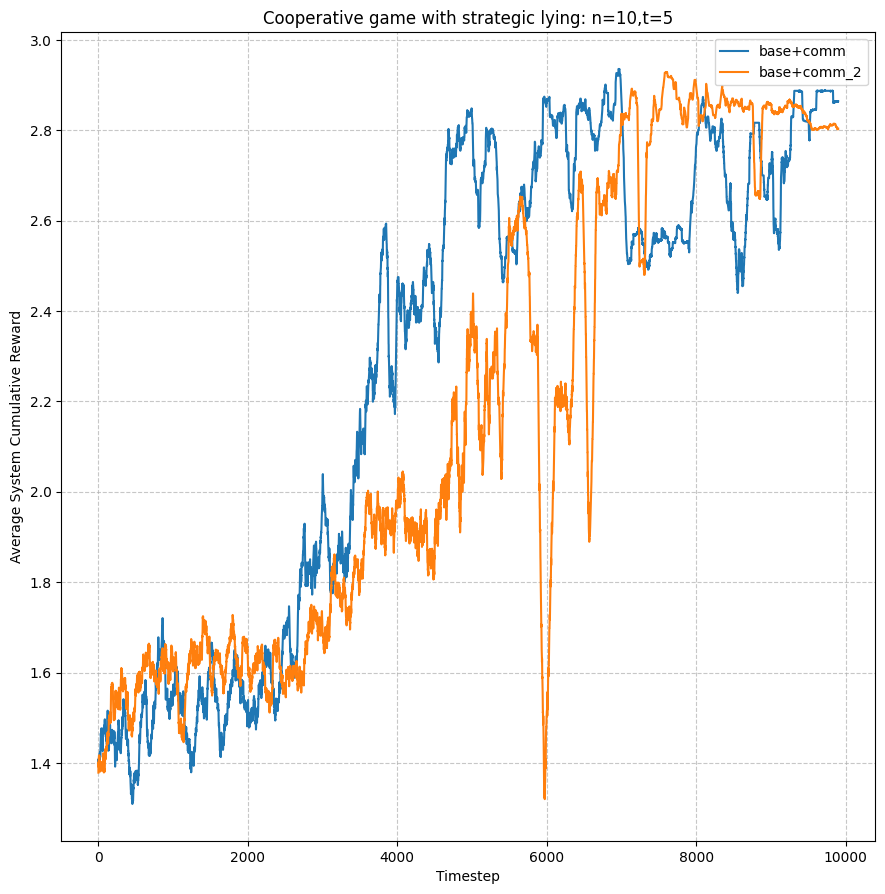

In [5]:
import matplotlib.pyplot as plt
import numpy as np

# set parameters
n = 10
t = 5

def moving_average(arr, window_size):
    moving_averages = []
    for i in range(len(arr) - window_size + 1):
        window = arr[i:i + window_size]
        average = sum(window) / window_size
        moving_averages.append(average)
    return moving_averages


# load simulation results
cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_bc.npy')
cum_rew_2 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_bc2.npy')

# average over the simulations
cum_rew_1 = np.mean(cum_rew_1, axis=0)
cum_rew_2= np.mean(cum_rew_2, axis=0)

# plot cum rew graphs
plt.title(f'Cooperative game with strategic lying: n={n},t={t}')
plt.xlabel('Timestep')
plt.ylabel('Average System Cumulative Reward')

plt.plot(moving_average(cum_rew_1,100), label='base+comm')
plt.plot(moving_average(cum_rew_2,100), label='base+comm_2')

fig = plt.gcf()
fig.set_size_inches(10.5, 10.5)

plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)


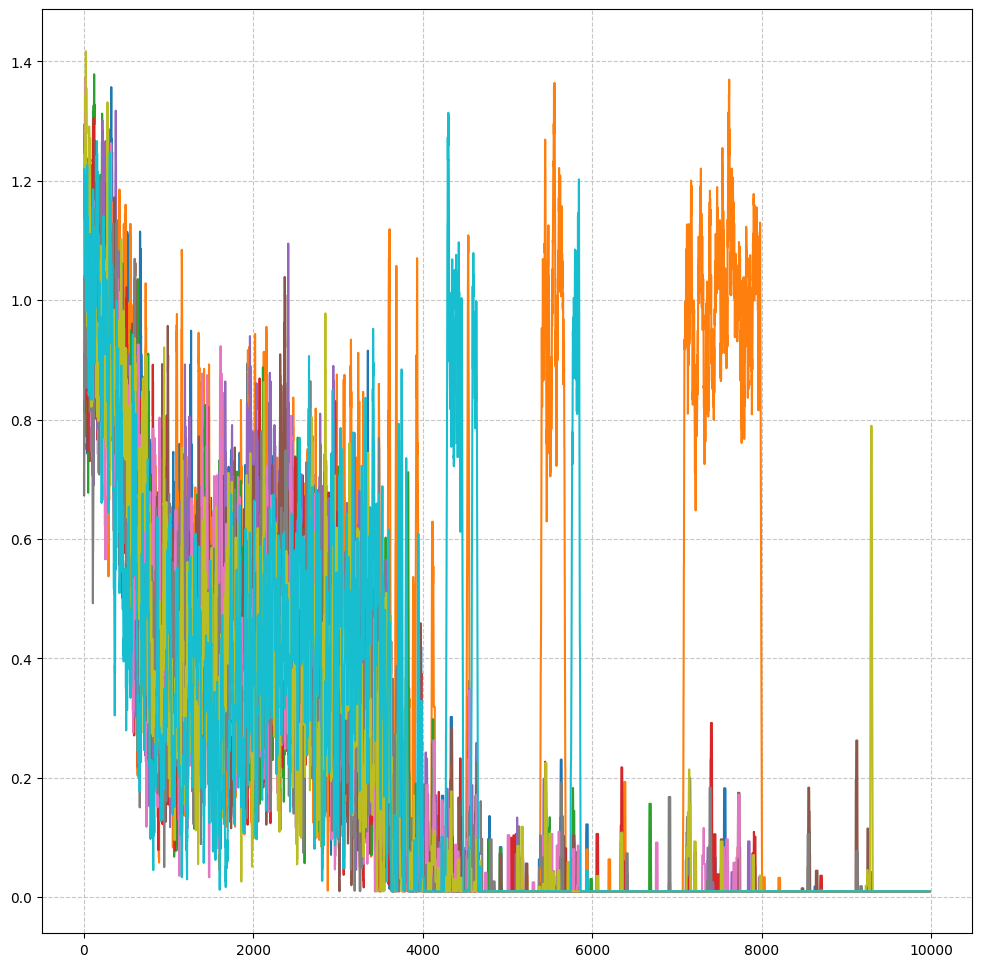

In [6]:
actions_1 = np.load(f'data/base_comm/n{n}t{t}_actions_bc.npy')

for i in range(n):
    plt.plot(moving_average(actions_1[:,i], 20))

fig = plt.gcf()
plt.grid(True, linestyle='--', alpha=0.7)
fig.set_size_inches(12, 12)

In [7]:
struct_1 = np.load(f'data/base_comm/n{n}t{t}_cstruct_cnf0.npy')

sets_list = [set([f'{i+1}' for i, val in enumerate(row) if val == 1]) for row in struct_1]
print(sets_list)



[set(), set(), {'10', '2', '1', '3', '6'}, {'5', '8', '4', '9', '7'}, set()]


IndexError: index 1 is out of bounds for axis 0 with size 1

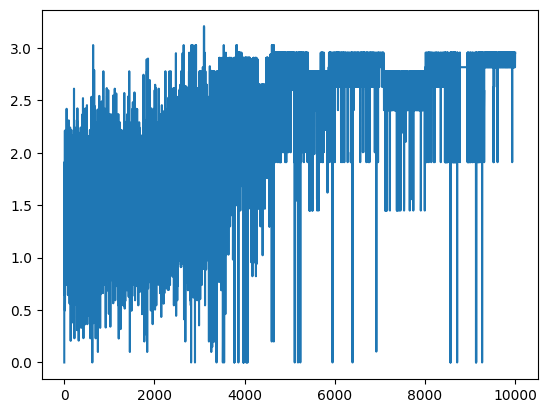

In [8]:
# comparing multiple runs

for i in range(cum_rew_1.shape[0]-1):
    cum_rew_1 = np.load(f'data/base_comm/n{n}t{t}_cum_rew_bc.npy')
    arr = cum_rew_1[i,:]
    plt.plot(arr)

plt.grid(True, linestyle='--', alpha=0.7)
plt.xlabel('Timestep', fontsize=25)
plt.ylabel('Cumulative Average System Reward', fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
fig = plt.gcf()
fig.set_size_inches(12, 12)
#plt.savefig("n10t5solutionscomparison.png")